## เตรียมข้อมูลก่อนนำไปวิเคราะห์

### แบบบัญชีรายการที่ดิน เทศบาลเมืองลำพูน อำเภอ เมืองลำพูน จังหวัด ลำพูน

#### เปิดไฟล์และทำความสะอาดข้อมูล

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [32]:
# เปิดไฟล์ csv
df_65 = pd.read_csv("dataset/2565.csv")


# เติมค่าว่างตั้งแต่หลักที่ 8 ให้เป็น 0
df_65.iloc[:, 8:] = df_65.iloc[:, 8:].fillna("0")  

# เติมค่าว่างให้เป็น -
df_65 = df_65.fillna("-")  

# แปลงประเภทของข้อมูลให้เป็นตัวเลข
df_65.iloc[:, 8:] = df_65.iloc[:, 8:].astype(float) 

C:\Users\NotOte\AppData\Local\Temp\ipykernel_11776\2153379953.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0
1       0
2       0
3       0
4       0
       ..
5813    0
5814    0
5815    0
5816    0
5817    0
Name: usage_agriculture, Length: 5818, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_65.iloc[:, 8:] = df_65.iloc[:, 8:].fillna("0")
C:\Users\NotOte\AppData\Local\Temp\ipykernel_11776\2153379953.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       45.0
1          0
2          0
3          0
4          0
        ... 
5813    17.0
5814       0
5815       0
5816    17.0
5817       0
Name: usage_living, Length: 5818, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_65.iloc[:, 8:] = df_65.iloc[:, 8:].fi

In [33]:
# แสดงข้อมูล
df_65

,order,type,document_number,parcel_number,sub_district_no,location_id,rai,ngan,tarang_wa,usage_agriculture,usage_living,usage_other,usage_none,usage_misc
0,1,โฉนด,-,-,1548,03E003,0,0,45.0,0.0,45.0,0.0,0.0,0.0
1,2,อื่น ๆ,-,-,-,05K001,9,3,26.4,0.0,0.0,0.0,0.0,0.0
2,3,-,-,24,1691,05K002,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,อื่น ๆ,-,-,-,05K003,3,0,93.5,0.0,0.0,0.0,0.0,0.0
4,5,-,-,-,-,04A103,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813,5814,โฉนด,132258.0,2834,5774,06E038/030,0,0,17.0,0.0,17.0,0.0,0.0,0.0
5814,5815,โฉนด,132259.0,2835,5775,06E038/031,0,0,17.0,0.0,0.0,0.0,0.0,17.0
5815,5816,โฉนด,132260.0,2836,5776,06E038/032,0,0,17.0,0.0,0.0,0.0,0.0,17.0
5816,5817,โฉนด,132261.0,2837,5777,06E038/033,0,0,17.0,0.0,17.0,0.0,0.0,0.0


#### จำแนกลักษณะการทำประโยชน์

In [34]:
# สร้างคอลัมม์ใหม่
df_65["type_of_usage"] = pd.Series([float('NaN')] * len(df_65))

In [35]:
# จำแนกลักษณ์การทำประโยชน์จากพื้นที่ใช้งาน ('พื้นที่ประกอบเกษตรกรรม', 'พื้นที่อยู่อาศัย', 'พื้นที่อื่น ๆ', 'พื้นที่ว่างเปล่า', 'พื้นที่ใช้ประโยชน์หลายประเภท' และ 'ไม่ทราบลักษณะการใช้')
df_65[df_65["usage_agriculture"] > 0] = df_65[df_65["usage_agriculture"] > 0].fillna("agriculture")
df_65[df_65["usage_living"] > 0] = df_65[df_65["usage_living"] > 0].fillna("living")
df_65[df_65["usage_other"] > 0] = df_65[df_65["usage_other"] > 0].fillna("other")
df_65[df_65["usage_none"] > 0] = df_65[df_65["usage_none"] > 0].fillna("wasteland")
df_65[df_65["usage_misc"] > 0] = df_65[df_65["usage_misc"] > 0].fillna("misc")        
df_65["type_of_usage"] = df_65["type_of_usage"].fillna("unknown")

C:\Users\NotOte\AppData\Local\Temp\ipykernel_11776\28383053.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_65[df_65["usage_agriculture"] > 0] = df_65[df_65["usage_agriculture"] > 0].fillna("agriculture")
C:\Users\NotOte\AppData\Local\Temp\ipykernel_11776\28383053.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['agriculture' 'agriculture' 'agriculture' 'agriculture' 'agriculture'
 'agriculture' 'agriculture' 'agriculture' 'agriculture' 'agriculture'
 'agriculture' 'agriculture' 'agriculture' 'agriculture' 'agriculture'
 'agriculture' 'agriculture' 'agriculture' 'agriculture' 'agriculture'
 'agriculture' 'agriculture' 'agriculture' 'agriculture' 'agriculture'
 'agriculture' 'ag

In [36]:
# แสดงข้อมูลโดยจำแนกออกมาแค่ รหัสแปลงที่ดิน และ ลักษณะการใช้ประโยชน์
# พื้นที่ประกอบเกษตรกรรม : agriculture, พื้นที่อยู่อาศัย : living, พื้นที่อื่น ๆ : other, 
# พื้นที่ว่างเปล่า : wasteland, พื้นที่ใช้ประโยชน์หลายประเภท : misc และ ไม่ทราบลักษณะการใช้ : unknown

df_65[ ['location_id', 'type_of_usage'] ]

,location_id,type_of_usage
0,03E003,living
1,05K001,unknown
2,05K002,unknown
3,05K003,unknown
4,04A103,unknown
...,...,...
5813,06E038/030,living
5814,06E038/031,misc
5815,06E038/032,misc
5816,06E038/033,living


## วิเคราะห์ข้อมูลและรายงานผล

#### จากแบบบัญชีรายการที่ดิน เทศบาลเมืองลำพูน อำเภอเมือง จังหวัดลำพูน ในปี 2565 มีที่ดิน 5818 ที่

In [37]:
land = len(df_65) 
land

5818

### ที่ดินสามารถจำแนกจากลักษณะการทำประโยชน์ 6 รายการ ได้แก่ ประกอบการเกษตร, ใช้เพื่ออยู่อาศัย, อื่น ๆ , ไม่ใช้ประโยชน์, ใช้ประโยชน์หลายประเภท และ ไม่ทราบลักษณะการใช้

#### มีพื้นที่ประกอบเกษตรกรรม 389 พื้นที่ คิดเป็น 6.6861 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [38]:
len(df_65[df_65["type_of_usage"] == "agriculture"])

389

In [39]:
(len(df_65[df_65["type_of_usage"] == "agriculture"]) / land) * 100  

6.686146442076314

#### มีพื้นที่อยู่อาศัย 3598 พื้นที่ คิดเป็น 61.8426 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน 

In [40]:
len(df_65[df_65["type_of_usage"] == "living"]) 

3598

In [41]:
len(df_65[df_65["type_of_usage"] == "living"]) / land * 100

61.842557579924375

#### มีพื้นที่อื่น ๆ 627 พื้นที่ คิดเป็น 10.7769 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [42]:
len(df_65[df_65["type_of_usage"] == "other"])

627

In [43]:
len(df_65[df_65["type_of_usage"] == "other"]) / land * 100

10.77689927810244

#### มีพื้นที่ว่างเปล่า/ไม่ทำประโยชน์ 596 พื้นที่ คิดเป็น 10.2441 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [44]:
len(df_65[df_65["type_of_usage"] == "wasteland"])

596

In [45]:
len(df_65[df_65["type_of_usage"] == "wasteland"]) / land * 100

10.244070127191476

#### และมีพื้นที่ใช้ประโยชน์หลายประเภท 548 พื้นที่ คิดเป็น 9.4191 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [46]:
len(df_65[df_65["type_of_usage"] == "misc"])

548

In [47]:
len(df_65[df_65["type_of_usage"] == "misc"]) / land * 100

9.419044345135784

#### และมีพื้นที่ไม่ทราบลักษณะการใช้ 60 พื้นที่ คิดเป็น 1.0313 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [48]:
len(df_65[df_65["type_of_usage"] == "unknown"])

60

In [49]:
len(df_65[df_65["type_of_usage"] == "unknown"]) / land * 100

1.0312822275696116

#### จากข้อมูลข้างต้น สามารถนำมาแสดงเป็นแผนภาพได้ดังนี้

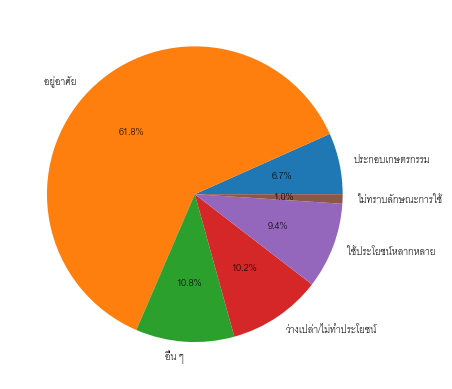

In [50]:
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

plt.rcParams["font.family"] = "Cordia New"
plt.rcParams["font.serif"] = "Cordia New"

# สร้างกราฟ
data = [ len(df_65[df_65["type_of_usage"] == "agriculture"]),
         len(df_65[df_65["type_of_usage"] == "living"]), 
         len(df_65[df_65["type_of_usage"] == "other"]), 
         len(df_65[df_65["type_of_usage"] == "wasteland"]), 
         len(df_65[df_65["type_of_usage"] == "misc"]),
         len(df_65[df_65["type_of_usage"] == "unknown"])
       ]
labels = ['ประกอบเกษตรกรรม','อยู่อาศัย ','อื่น ๆ','ว่างเปล่า/ไม่ทำประโยชน์','ใช้ประโยชน์หลากหลาย', 'ไม่ทราบลักษณะการใช้'] 

plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.show()

##  ข้อมูลเฉพาะลักษณะการใช้ประโยชน์แบบประกอบเกษตรกรรม

#### ดูข้อมูลทั้งหมด

In [51]:
df_65["type"] = df_65["type"].replace("-", "ไม่ระบุ")
agricultrue_land = df_65[df_65["type_of_usage"] == "agriculture"]
agricultrue_land

,order,type,document_number,parcel_number,sub_district_no,location_id,rai,ngan,tarang_wa,usage_agriculture,usage_living,usage_other,usage_none,usage_misc,type_of_usage
43,44,โฉนด,24.0,2097,34,04A102,0,2,2.8,202.8,0.0,0.0,0.0,0.0,agriculture
56,57,โฉนด,37.0,549,68,04B032,0,1,12.0,112.0,0.0,0.0,0.0,0.0,agriculture
147,148,โฉนด,131.0,2232,364,02L067,0,1,70.0,170.0,0.0,0.0,0.0,0.0,agriculture
212,213,โฉนด,197.0,2243,372,02L053,0,0,76.3,76.3,0.0,0.0,0.0,0.0,agriculture
224,225,โฉนด,209.0,2192,384,02L032,0,0,61.4,61.4,0.0,0.0,0.0,0.0,agriculture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5729,5730,โฉนด,130393.0,2097,5491,06K001/016,2,3,35.9,1135.9,0.0,0.0,0.0,0.0,agriculture
5750,5751,โฉนด,130954.0,2806,5511,06A062/003,0,0,38.4,38.4,0.0,0.0,0.0,0.0,agriculture
5751,5752,โฉนด,131184.0,1044,5514,02F010/001,0,0,81.9,81.9,0.0,0.0,0.0,0.0,agriculture
5754,5755,โฉนด,131244.0,2164,13521,05C051/016,0,0,83.1,83.1,0.0,0.0,0.0,0.0,agriculture


#### จำนวนที่ดินที่ประกอบเกษตรกรรม

In [52]:
len(agricultrue_land) # 389 ที่

389

#### ดูข้อมูลทั้งหมดจำแนกแยกด้วยประเภท

In [53]:
df_65.groupby('type').size()

type
ที่ราชพัสดุ       9
น.ส.3            15
น.ส.ล.            2
อื่น ๆ            2
โฉนด           5779
ไม่ระบุ          11
dtype: int64

In [54]:
agricultrue_land.groupby('type').size()

# โฉนด 389 ที่

type
โฉนด    389
dtype: int64

#### สามารถดาวน์โหลดไฟล์ csv โดยการนำ '#' ออกและกดรันโปรแกรม

In [55]:
# df_65.to_csv('target/data2565.csv', index=False)

In [56]:
df_65.iloc[:, 8:] = df_65.iloc[:, 8:].replace(0,'-')
df_65.iloc[:, -1] = df_65.iloc[:, -1].replace("agriculture", "ประกอบเกษตรกรรม")
df_65.iloc[:, -1] = df_65.iloc[:, -1].replace("living", "อยู่อาศัย")
df_65.iloc[:, -1] = df_65.iloc[:, -1].replace("other", "อื่น ๆ")
df_65.iloc[:, -1] = df_65.iloc[:, -1].replace("wasteland", "ว่างเปล่า/ไม่ทำประโยชน์")
df_65.iloc[:, -1] = df_65.iloc[:, -1].replace("misc", "ใช้ประโยชน์หลากหลาย")
df_65.iloc[:, -1] = df_65.iloc[:, -1].replace("unknown", "ไม่ทราบลักษณะการใช้ ")

C:\Users\NotOte\AppData\Local\Temp\ipykernel_11776\1798198512.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       45.0
1       26.4
2          -
3       93.5
4          -
        ... 
5813    17.0
5814    17.0
5815    17.0
5816    17.0
5817    17.0
Name: tarang_wa, Length: 5818, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_65.iloc[:, 8:] = df_65.iloc[:, 8:].replace(0,'-')


In [57]:
df_65 = df_65.rename(columns={
                    "order": "ที่", 
                    "type": "ประเภทที่ดิน", 
                    "document_number": "เลขที่เอกสารสิทธิ์",
                    "parcel_number": "เลขที่ดิน",
                    "sub_district_no" : "หน้าสำรวจ",
                    "location_id" : "รหัสแปลงที่ดิน",
                    "rai" : "ไร่",
                    "ngan" : "งาน",
                    "tarang_wa" : "ตร.ว.",
                    "usage_agriculture" : "ประกอบเกษตรกรรม (ตร.ว.)",
                    "usage_living" : "อยู่อาศัย (ตร.ว.)",
                    "usage_other" : "อื่น ๆ (ตร.ว.)",
                    "usage_none" : "ว่างเปล่า/ไม่ทำประโยชน์ (ตร.ว.)",
                    "usage_misc" : "ใช้ประโยชน์หลากหลาย (ตร.ว.)",
                    "type_of_usage" : "ลักษณะการทำประโยชน์"
                    }, errors="raise")

#### สามารถดาวน์โหลดไฟล์ csv (เฉพาะพื้นที่เกษตรกรรม) โดยการนำ '#' ออกและกดรันโปรแกรม

In [58]:
df_65[df_65["ลักษณะการทำประโยชน์"] == "ประกอบเกษตรกรรม"].to_csv('../result/พื้นที่ประกอบเกษตรกรรม/2565/พื้นที่ประกอบเกษตรกรรม2565.csv', index=False)

#### สามารถดาวน์โหลดไฟล์ excel โดยการนำ '#' ออกและกดรันโปรแกรม

In [59]:
df_65[df_65["ลักษณะการทำประโยชน์"] == "ประกอบเกษตรกรรม"].to_excel('../result/พื้นที่ประกอบเกษตรกรรม/2565/พื้นที่ประกอบเกษตรกรรม2565.xlsx', index=False)

#### สามารถดาวน์โหลดไฟล์ csv (เฉพาะพื้นที่รกร้าง) โดยการนำ '#' ออกและกดรันโปรแกรม

In [60]:
df_65[df_65["ลักษณะการทำประโยชน์"] == "ว่างเปล่า/ไม่ทำประโยชน์"].to_csv('../result/พื้นที่ประกอบเกษตรกรรม/2565/พื้นที่รกร้าง2565.csv', index=False)

#### สามารถดาวน์โหลดไฟล์ excel (เฉพาะพื้นที่รกร้าง) โดยการนำ '#' ออกและกดรันโปรแกรม

In [61]:
df_65[df_65["ลักษณะการทำประโยชน์"] == "ว่างเปล่า/ไม่ทำประโยชน์"].to_excel('../result/พื้นที่ประกอบเกษตรกรรม/2565/พื้นที่รกร้าง2565.xlsx', index=False)

----

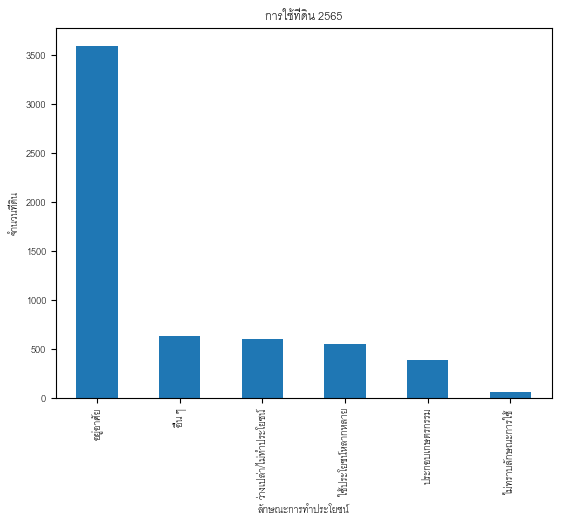

In [62]:
value_counts = df_65["ลักษณะการทำประโยชน์"].value_counts() 
value_counts.plot(kind="bar")
plt.title("การใช้ที่ดิน 2565")
plt.xlabel("ลักษณะการทำประโยชน์")
plt.ylabel("จำนวนที่ดิน")
plt.show()